<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         120 non-null    int64  
 1   rownames           120 non-null    object 
 2   sampleNames        120 non-null    object 
 3   Sample             120 non-null    object 
 4   Ethnicity          120 non-null    object 
 5   Sample_ID          120 non-null    int64  
 6   Origin             120 non-null    object 
 7   Row                120 non-null    int64  
 8   Classification     120 non-null    int64  
 9   Rep                120 non-null    object 
 10  E.Cad              120 non-null    float64
 11  CDH2               120 non-null    float64
 12  Twist.1            120 non-null    float64
 13  Laminin            120 non-null    float64
 14  S100A4             120 non-null    float64
 15  Cadherin.11        120 non-null    float64
 16  MUC1               120 non

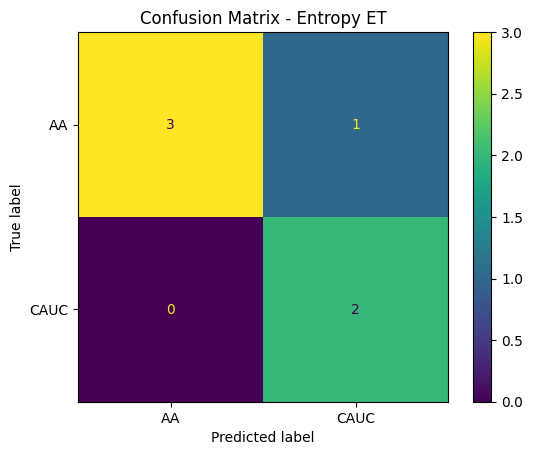

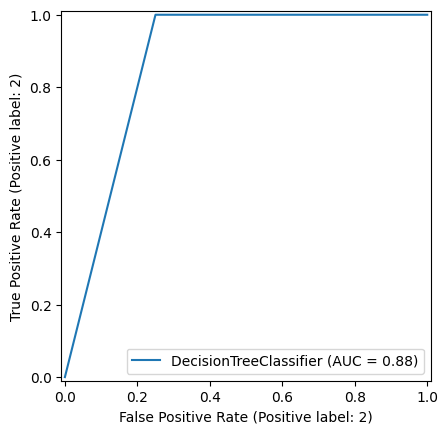

entropy ET AUC:  0.875
entropy ET recall:  0.8333333333333334
entropy ET F1:  0.8333333333333334
   Metric   Entropy
0     AUC  0.875000
1  Recall  0.833333
2      F1  0.833333
+----+----------+-----------+
|    | Metric   |   Entropy |
+====+==========+===========+
|  0 | AUC      |  0.875    |
+----+----------+-----------+
|  1 | Recall   |  0.833333 |
+----+----------+-----------+
|  2 | F1       |  0.833333 |
+----+----------+-----------+
   Metric   Entropy
0     AUC  0.875000
1  Recall  0.833333
2      F1  0.833333
|--- feature_24 <= 2.91
|   |--- class: 2
|--- feature_24 >  2.91
|   |--- feature_34 <= 13.89
|   |   |--- feature_32 <= 12.57
|   |   |   |--- feature_26 <= 12.50
|   |   |   |   |--- feature_35 <= 9.07
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_35 >  9.07
|   |   |   |   |   |--- feature_11 <= 8.63
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_11 >  8.63
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_26 > 

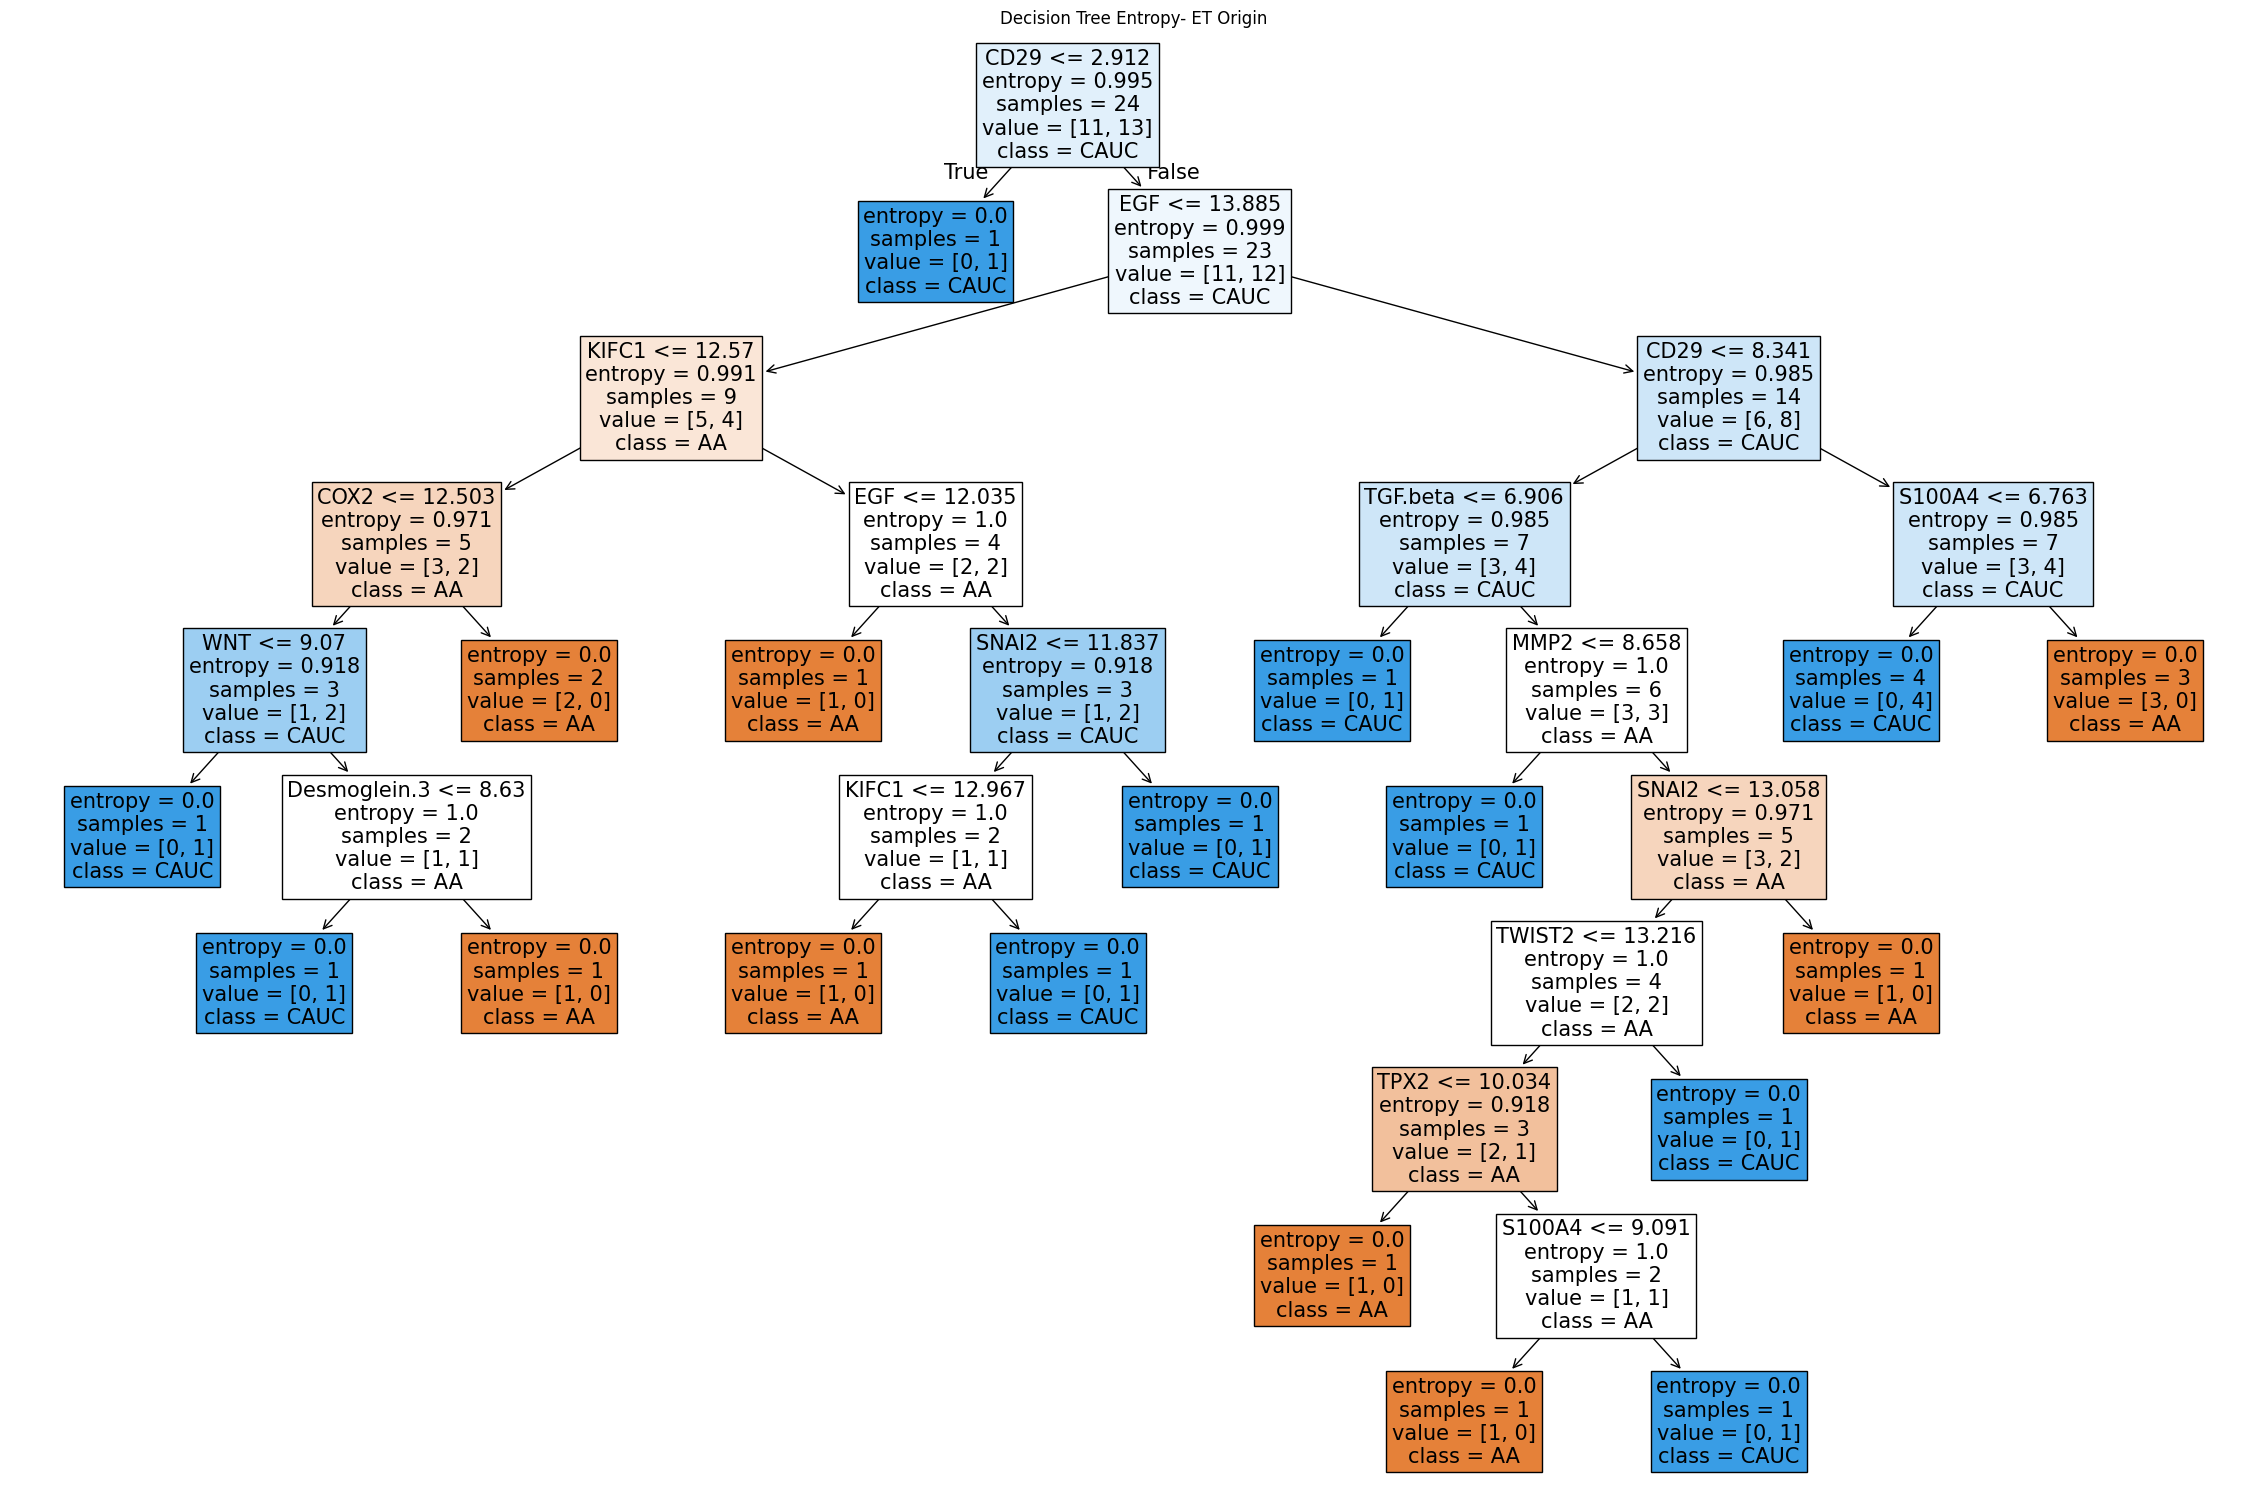

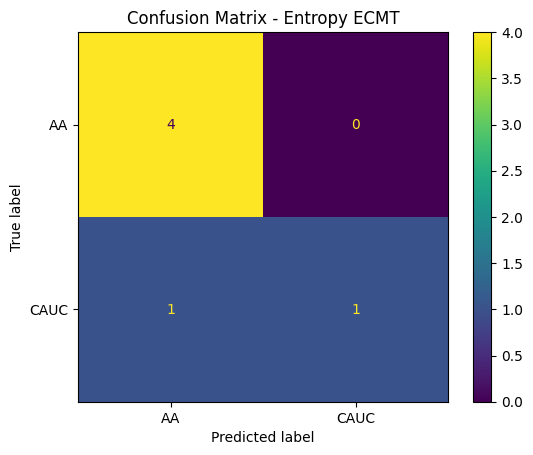

Entropy Accuracy is  83.33333333333334
Entropy AUC: 0.75
Entropy Recall: 0.8333333333333334
Entropy F1: 0.8333333333333334
   Metric   Entropy
0     AUC  0.750000
1  Recall  0.833333
2      F1  0.833333
+----+----------+-----------+
|    | Metric   |   Entropy |
+====+==========+===========+
|  0 | AUC      |  0.75     |
+----+----------+-----------+
|  1 | Recall   |  0.833333 |
+----+----------+-----------+
|  2 | F1       |  0.833333 |
+----+----------+-----------+
   Metric   Entropy
0     AUC  0.750000
1  Recall  0.833333
2      F1  0.833333
|--- feature_16 <= 12.79
|   |--- feature_0 <= 3.98
|   |   |--- feature_32 <= 11.09
|   |   |   |--- class: 1
|   |   |--- feature_32 >  11.09
|   |   |   |--- class: 2
|   |--- feature_0 >  3.98
|   |   |--- feature_19 <= 18.36
|   |   |   |--- feature_36 <= 13.79
|   |   |   |   |--- feature_22 <= 8.81
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_22 >  8.81
|   |   |   |   |   |--- feature_21 <= 6.12
|   |   |   |   |   | 

Text(0.5, 1.0, 'Decision Tree - Entropy Index - ECMT')

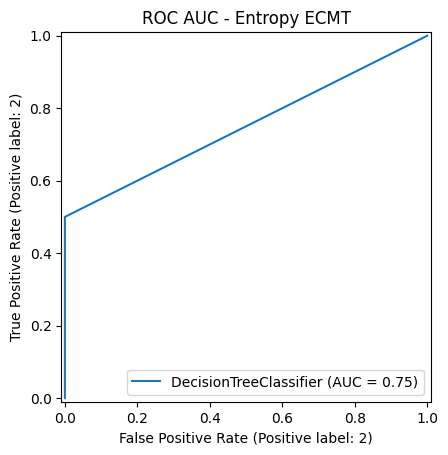

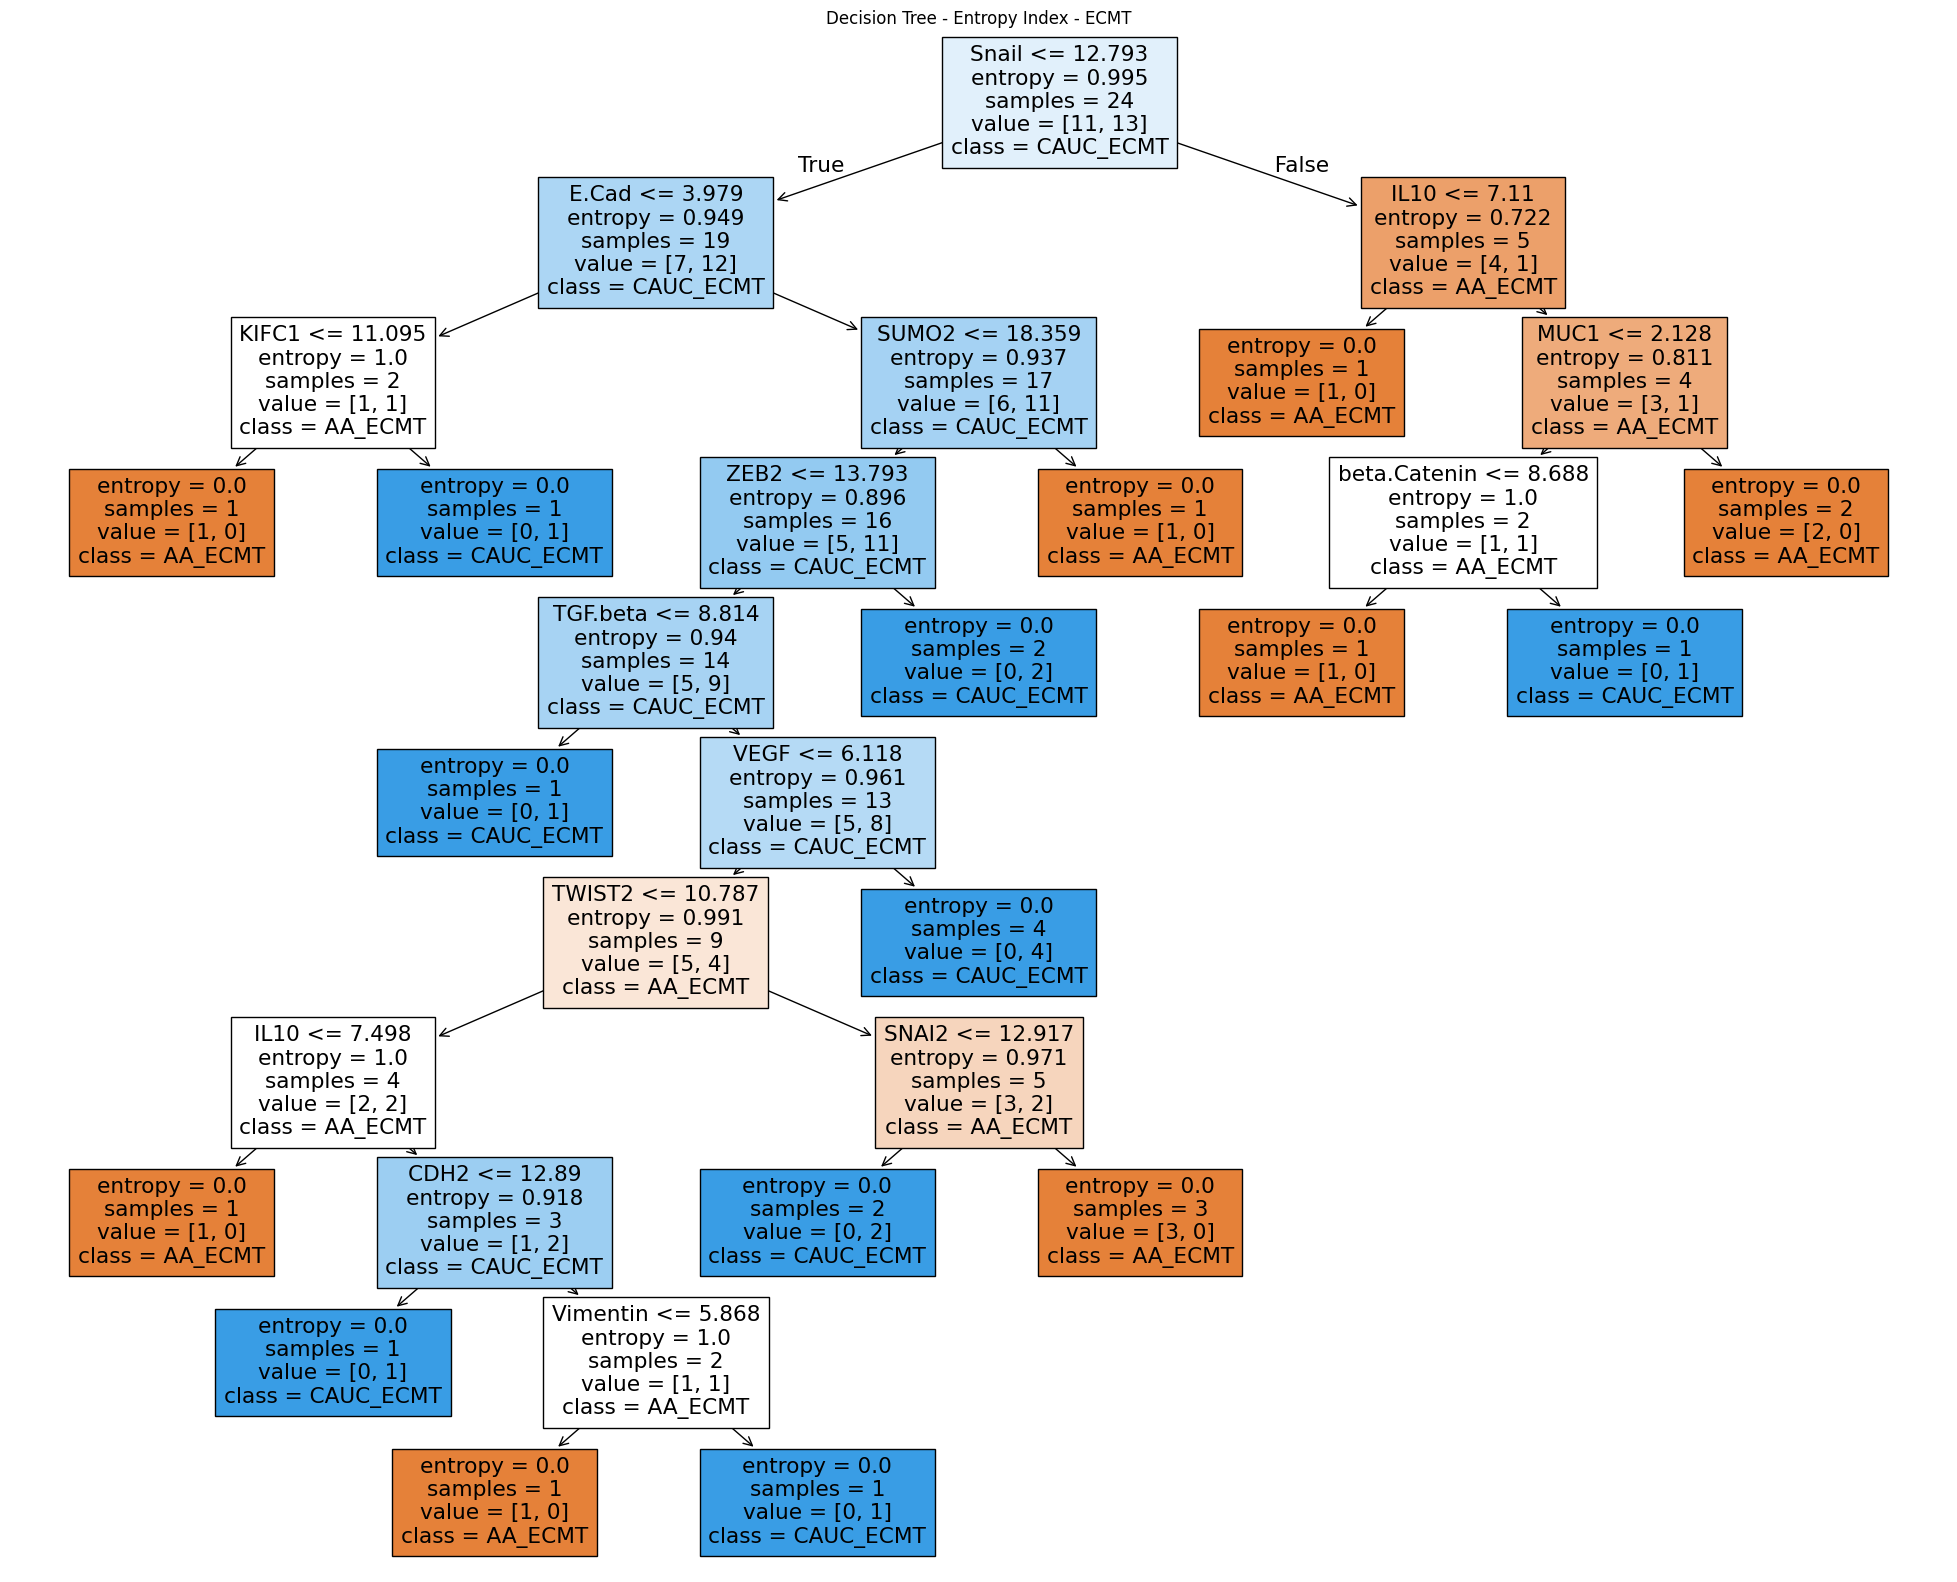

In [6]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import dtreeviz
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import graphviz
import pydotplus
import re
genes= pd.read_csv("/normalisedgenes.csv")
genes = pd.DataFrame(genes)
genes[0:]
genes.info()
genesET = genes[genes['Origin'].isin(['ET'])].copy()
genesET.shape
type(genesET)
genesET.info()
genesET.head()
print ("Dataset Lenght:", len(genesET))
print ("Dataset Shape:: ", genesET.shape)
XET = genesET.iloc[:,10:49]
yET = genesET.iloc[:,8]
XET_train, XET_test, yET_train, yET_test = train_test_split( XET, yET, test_size = 0.2, random_state =10)
clf_entropyET = DecisionTreeClassifier(criterion = "entropy", splitter='random',random_state = 5,max_depth=None, min_samples_leaf =1,min_samples_split=2, max_features = 1)
clf_entropyET.fit(XET_train, yET_train)
y_pred_enET = clf_entropyET.predict(XET_test)
print ("entropy ET Accuracy is ", accuracy_score(yET_test,y_pred_enET)*100)
df=pd.DataFrame({'Actual':yET_test, 'Predicted':y_pred_enET,'Accuracy':accuracy_score(yET_test,y_pred_enET)*100 })
print(df)
print ("entropy ET Accuracy is ", accuracy_score(yET_test,y_pred_enET)*100)
print('entropy Mean Absolute Error:', metrics.mean_absolute_error(yET_test, y_pred_enET))
print('entropy Mean Squared Error:', metrics.mean_squared_error(yET_test, y_pred_enET))
print('entropy Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yET_test, y_pred_enET)))
confusion_matrixETen = metrics.confusion_matrix(yET_test, y_pred_enET)
cm_displayETen = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixETen, display_labels = ["AA", "CAUC"])
cm_displayETen.plot()
cm_displayETen.ax_.set_title('Confusion Matrix - Entropy ET')
plt.show()
RocCurveDisplay.from_estimator(clf_entropyET, XET_test, yET_test)
plt.show() 
aucen_ET = metrics.roc_auc_score(yET_test,y_pred_enET)
print("entropy ET AUC: ",aucen_ET) 
recallen_ET=recall_score(yET_test, y_pred_enET, average='micro')
print("entropy ET recall: ",recallen_ET)
F1en_ET=f1_score(yET_test, y_pred_enET, average='micro')
print("entropy ET F1: ",F1en_ET)
from tabulate import tabulate
table_ET = {
    'Metric': ['AUC', 'Recall', 'F1'],
    'Entropy': [aucen_ET, recallen_ET, F1en_ET]
}
# Create a DataFrame
Metrics_table_ET = pd.DataFrame(table_ET)
# Print the DataFrame
print(Metrics_table_ET)
print(tabulate(Metrics_table_ET, headers='keys', tablefmt='grid'))
print(Metrics_table_ET)
X_combinedET = np.vstack((XET_train, XET_test))
y_combinedET = np.hstack((yET_train, yET_test))
filler_feature_values = []
for feature_idx in range(X_combinedET.shape[1]):
    min_value = np.min(X_combinedET[:, feature_idx])
    max_value = np.max(X_combinedET[:, feature_idx])
    filler_feature_values.append(np.linspace(min_value, max_value, num=100))  # Adjust the number of points as needed

# Convert XET.columns to a list using .tolist()
feature_names_list = XET.columns.tolist()

# Decision Tree with Entropy Index - ET
text_representation = tree.export_text(clf_entropyET)
print(text_representation)
with open("decision_tree_entropy.log", "w") as fout:
    fout.write(text_representation)

width = 29
height = 19
plt.figure(figsize=(width, height))
a = tree.plot_tree(clf_entropyET, feature_names=feature_names_list, class_names=["AA", "CAUC"], filled=True,fontsize=15)
plt.title("Decision Tree Entropy- ET Origin")
genesECMT = genes[genes['Origin'].isin(['ECMT'])].copy()
genesECMT.shape
type(genesECMT)
print ("Dataset Lenght:", len(genesECMT))
print ("Dataset Shape:: ", genesECMT.shape)
XECMT = genesECMT.iloc[:,10:49]
print(XECMT.shape)
yECMT = genesECMT.iloc[:,8]
random_state = 12883823
XECMT_train, XECMT_test, yECMT_train, yECMT_test = train_test_split( XECMT, yECMT, test_size = 0.2,random_state =random_state)
clf_entropyECMT = DecisionTreeClassifier(criterion = "entropy", splitter='random',random_state = 42,max_depth=None, min_samples_leaf =1,min_samples_split=2, max_features =1)
clf_entropyECMT.fit(XECMT_train, yECMT_train)
y_pred_enECMT = clf_entropyECMT.predict(XECMT_test)
confusion_matrixECMTen = metrics.confusion_matrix(yECMT_test, y_pred_enECMT)
cm_displayECMTen = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixECMTen, display_labels = ["AA", "CAUC"])
cm_displayECMTen.plot()
cm_displayECMTen.ax_.set_title('Confusion Matrix - Entropy ECMT')
plt.show()
print ("Entropy Accuracy is ", accuracy_score(yECMT_test,y_pred_enECMT)*100)
RocenECMT=RocCurveDisplay.from_estimator(clf_entropyECMT, XECMT_test, yECMT_test)
RocenECMT.ax_.set_title('ROC AUC - Entropy ECMT')
auc_enECMT = metrics.roc_auc_score(yECMT_test,y_pred_enECMT)
print("Entropy AUC:",auc_enECMT) 
recall_enECMT=recall_score(yECMT_test, y_pred_enECMT, average='micro')
print("Entropy Recall:", recall_enECMT)
F1_enECMT=f1_score(yECMT_test, y_pred_enECMT, average='micro')
print("Entropy F1:",F1_enECMT) 
from tabulate import tabulate
table_ECMT = {
    'Metric': ['AUC', 'Recall', 'F1'],
    'Entropy': [auc_enECMT, recall_enECMT, F1_enECMT]
}
Metrics_table_ECMT = pd.DataFrame(table_ECMT)
# Print the DataFrame
print(Metrics_table_ECMT)
print(tabulate(Metrics_table_ECMT, headers='keys', tablefmt='grid'))
print(Metrics_table_ECMT)
X_combinedECMT = np.vstack((XECMT_train, XECMT_test))
y_combinedECMT = np.hstack((yECMT_train, yECMT_test))
filler_feature_values = []
for feature_idx in range(X_combinedECMT.shape[1]):
    min_value = np.min(X_combinedECMT[:, feature_idx])
    max_value = np.max(X_combinedECMT[:, feature_idx])
    filler_feature_values.append(np.linspace(min_value, max_value, num=100))  # Adjust the number of points as needed

feature_names_list = XECMT.columns.tolist()

# Decision Tree with Entropy Index - ECMT
text_representationECMTen = tree.export_text(clf_entropyECMT)
print(text_representationECMTen)
with open("decision_tree_entropy_ECMT.log", "w") as fout:
    fout.write(text_representationECMTen)

width = 25
height = 20
plt.figure(figsize=(width, height))
a = tree.plot_tree(clf_entropyECMT, feature_names=feature_names_list, class_names=["AA_ECMT", "CAUC_ECMT"], filled=True)
plt.title("Decision Tree - Entropy Index - ECMT")